# Elementary Propagation
S Singleton, J Mills, R Estler

### Background Reading
- *An Introduction to Error Analysis*, Taylor, University Science Books, 1997, Ch 3.
- Wikipedia [Propagation of Uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Simplification)
- "Error propagation: A functional approach," I.F. Hughes, T.P.A. Hase, *J. Chem. Ed.*, 89, 2012, p821,  [DOI: 10.1021/ed2004627](http://pubs.acs.org/doi/abs/10.1021/ed2004627)
- *A Student's Guide to Data and Error Analysis*, Berendsen, Cambridge U. Press, 2011, Ch 3.


## Task
Apply the general uncertainty propagation equation to the measurement situation listed
below to develop specific explicit uncertainty expressions.

For example
<center>Absorbance = absorptivity $\times$ path length $\times$ molarity</center>

$$A = a \times b \times M$$

The uncertainty in $A$ is $\delta A$, and so on.


$$
  \delta A = \sqrt{\left( \frac{\partial A}{\partial a}\right) ^2
    _{bM} \delta a^2 + \left(\frac{\partial A}{\partial b}
    \right)^2_{aM} \delta b^2 + \left(\frac{\partial A}{\partial
        M}\right)^2_{ab} \delta
    M^2 }
$$ 

Take the derivative of $A$ with respect to each variable and simplify:

$$
  = \sqrt{(b^2 M^2 \delta a^2 + a^2 M^2 \delta b^2 + a^2 b^2 \delta
  M^2)} $$

This is a symbolic manipulation, so we use `sympy`. It's safe to `import *` because we won't be doing any numerical work in this notebook. The uncertainty terms (e.g, $\delta a$) could be included, but I chose not to. In this case, I would manually include these terms in a solution (sometimes the computer isn't the best tool for everything?).

In [1]:
from __future__ import division, print_function

In [2]:
from sympy import *
init_printing()

In [3]:
var('a b M')

A = a * b * M
A

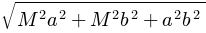

In [4]:
dA_da2 = diff(A, a)**2
dA_db2 = diff(A, b)**2
dA_dM2 = diff(A, M)**2

sum_squares = dA_da2 + dA_db2 + dA_dM2
sum_squares

sqrt(sum_squares)

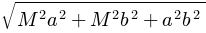

In [5]:
sqrt(sum(diff(A,x)**2 for x in ['a', 'b', 'M']))

In [6]:
A = a*b*M
for x in ['a', 'b', 'M']:
    print(x)
    pprint(diff(A, x))

a
M⋅b
b
M⋅a
M
a⋅b


## Your Turn
Derive uncertainty relationships for the following expressions. Constants are noted; all other labels are variables.

### Root-mean-square speed of a gas-phase molecule

$$ 
 v_{\text{rms}} = \sqrt{\frac{3 RT}{M}}   \qquad  R \text{ constant}
 $$

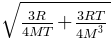

In [7]:
var('R T M')
v_rms = sqrt(3*R*T/M)

delta_v2 = sum(diff(v_rms, x)**2 for x in ['T', 'M'])
sqrt(delta_v2)

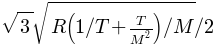

In [8]:
 # underscore is an alias for "output from last line"; use with caution
_.simplify() 

### van der Waals [equation of state](https://en.wikipedia.org/wiki/Van_der_Waals_equation) for real gases
 
$$P = \frac{RT}{V-b} - \frac{a}{V^2} \qquad  R \text{ constant}$$

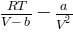

In [9]:
var('T V b a R')

P = R*T/(V-b) - (a/V**2)
P

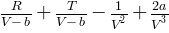

In [10]:
state_vars = [T, V, b, a, R]

partials = sum(diff(P,v) for v in state_vars)
partials

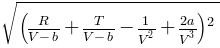

In [11]:
deltaP = sqrt(partials**2)
deltaP

### Compressibility of an ideal gas
$$Z = \frac{PV}{RT} \qquad  R \text{ constant}$$

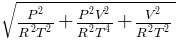

In [12]:
var("P V T R")
Z = P*V/(R*T)

deltaZ2 = sum(diff(Z,x)**2 for x in [P,V,T])
sqrt(deltaZ2)

### Rotational partition function
 
$$q_r  = \frac{2IkT}{\sigma h^2} \qquad k,\: \sigma,\: h
  \text{ constant}$$

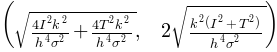

In [13]:
var('I k T sigma h')

q_r = 2*I*k*T/(sigma*h**2)
deltaq_r2 = sum(diff(q_r, x)**2 for x in [I,T])
sqrt(deltaq_r2), sqrt(deltaq_r2).simplify()

### Translational partition function
 
$$ q_{tr} = \left( \frac{2 \pi mkT}{h^2}\right) ^{3/2} \qquad
  k, h \text{ constant}
$$

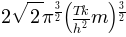

In [14]:
# exponent is a rational number
var('m k T h')

q_tr = ( 2*pi*m*k*T/h**2 )**(S(3)/2)
q_tr

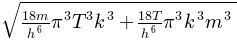

In [15]:
deltaq_tr = sqrt(sum(diff(q_tr,x)**2 for x in [m,T]))
deltaq_tr

In [16]:
var('p,v,r,t,a,b')

In [17]:
# compressibility of ideal gas
z = p*v/(r*t)
z, diff(z, p)

In [18]:
for x in [p, v, t]:
    w = diff(z, x)
    pprint(w), print('\n')

 v 
───
r⋅t


 p 
───
r⋅t


-p⋅v 
─────
    2
 r⋅t 




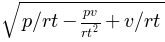

In [19]:
sqrt(sum([diff(z,x) for x in [p,v,t]]))

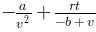

In [20]:
P = r*t/(v-b) - (a/v**2)
P

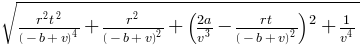

In [21]:
w = [diff(P, x)**2 for x in (a,b,v,t)]
sqrt(sum(w))

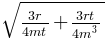

In [22]:
m=var('m')
vrms = sqrt(3*r*t/m)

w = sum([diff(vrms, x)**2 for x in (t,m)])
w**(S(1)/2)